In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model   import ARIMA, ARIMAResults



---

## AR

In [25]:
class myAR():
  def __init__(self, p : int, c: float, phi : np.array):
    self.p = p
    self.c = c
    self.phi = phi
  def fit(self, data_to_fit : np.array, burnin):
    size_of_data = len(data_to_fit)
    y = []
    for p_t in range(self.p):
      y.append(self.c)
    for t in range(self.p, size_of_data):
      y_t = self.c
      for p_t in range(self.p):
        y_t += self.phi[p_t] * y[t - (p_t + 1)]
      y_t += np.random.normal(0,1,size=1)[0]
      y.append(y_t)
    return np.array(y)[burnin:]
  def __repr__(self):
    string = "AR model: "+str(self.c)
    i = 1
    for phi_t in self.phi:
      if phi_t > 0:
        string += " + " + str(phi_t) + " * y_t-"+str(i)
      elif phi_t < 0:
        string += " - " + str(abs(phi_t)) + " * y_t-"+str(i)
      i += 1
    string += " + et"
    return string

In [26]:
ar = myAR(p=1, c=18.0, phi=np.array([-0.6]))
print(ar)
mean = 0
std = 1
num_samples = 5000
samples = np.random.normal(mean, std, size=num_samples)
y_t = ar.fit(samples, 1000)

AR model: 18.0 - 0.6 * y_t-1 + et


(4000,)


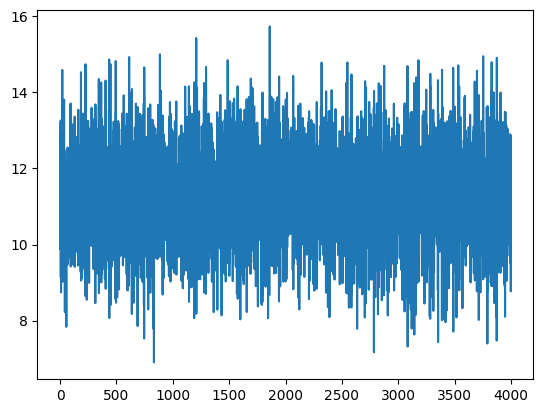

In [27]:
print(y_t.shape)
plt.plot(y_t)

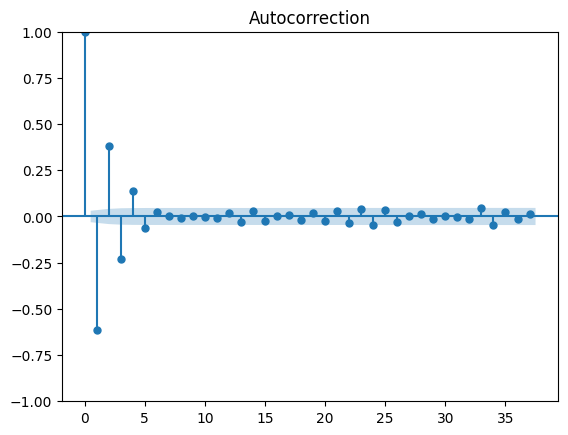

In [28]:
sm.graphics.tsa.plot_acf(y_t,
                             title="Autocorrection")
plt.show()

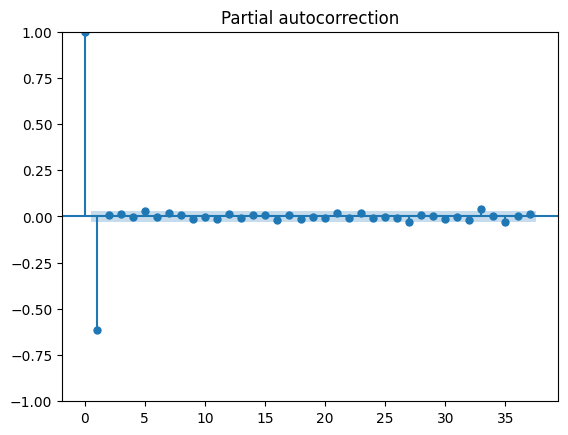

In [29]:
sm.graphics.tsa.plot_pacf(y_t,
                             title="Partial autocorrection")
plt.show()

AR model: 18.0 - 0.7 * y_t-1 + et


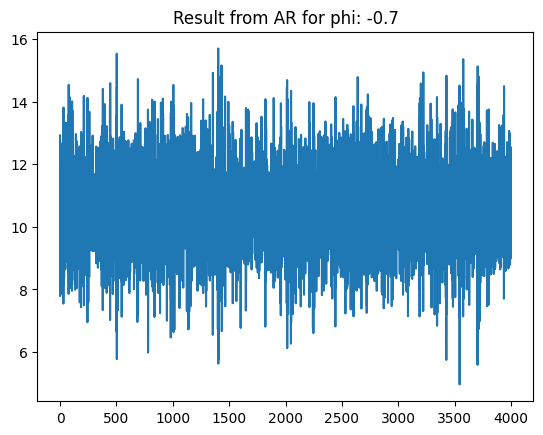

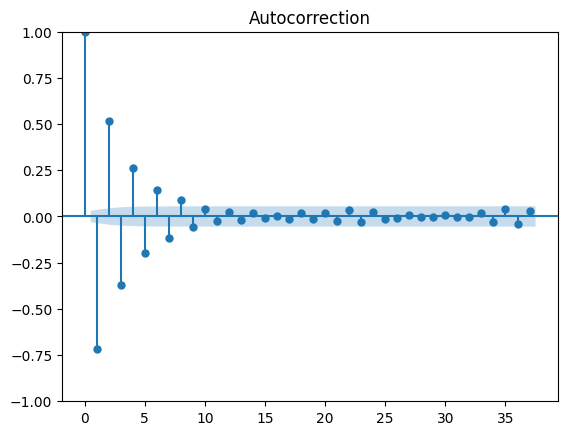

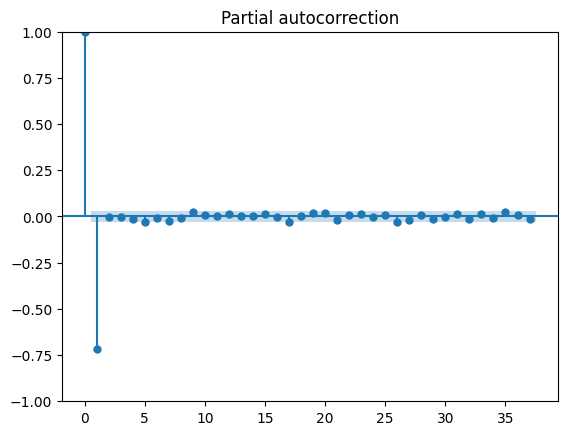

AR model: 18.0 - 0.8 * y_t-1 + et


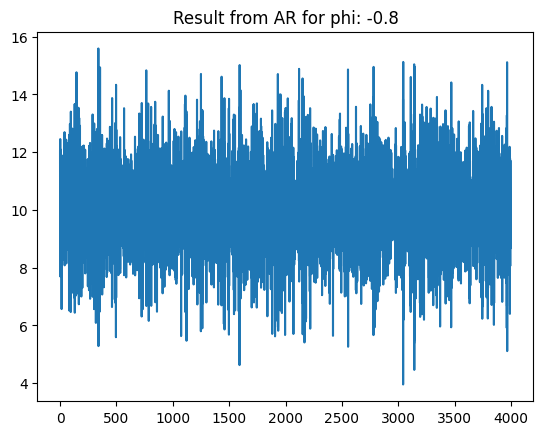

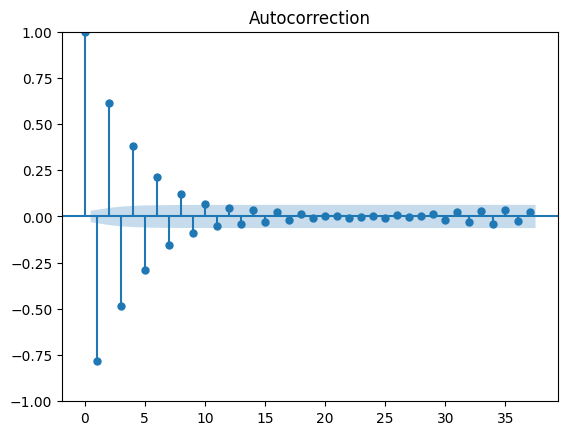

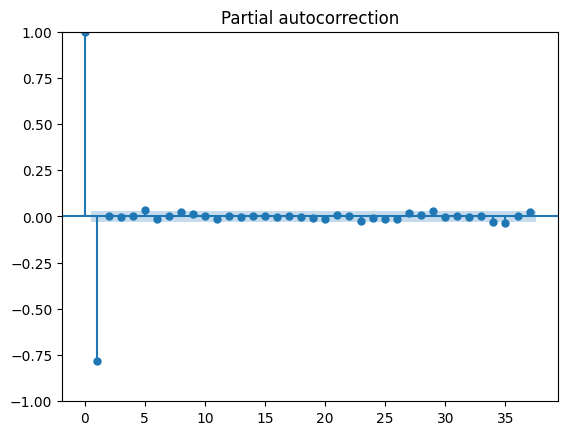

AR model: 18.0 - 0.9 * y_t-1 + et


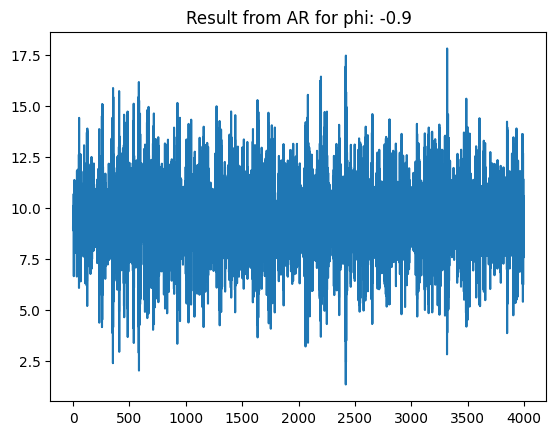

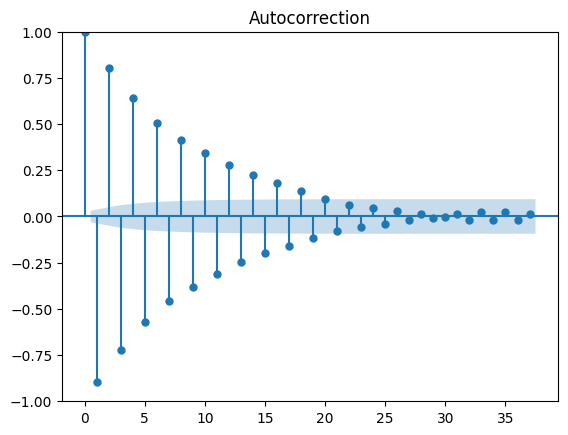

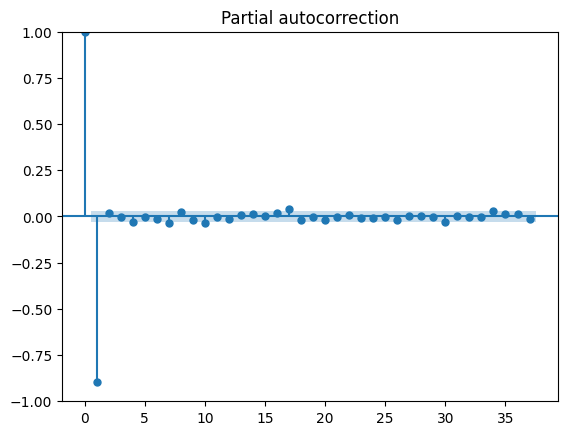

AR model: 18.0 - 1.01 * y_t-1 + et


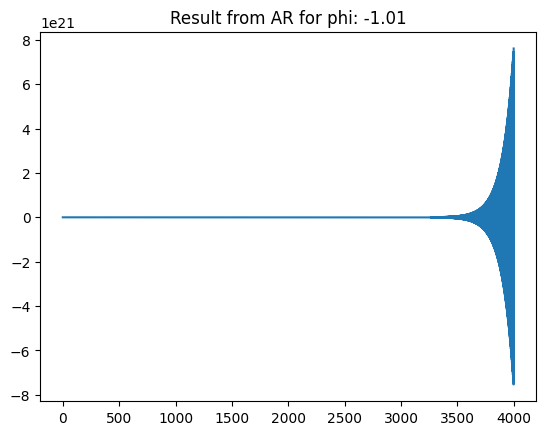

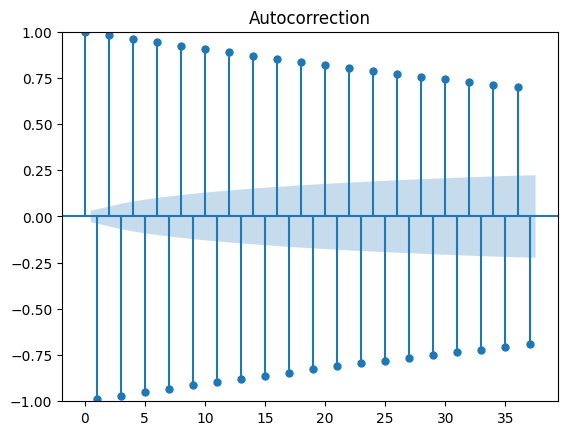

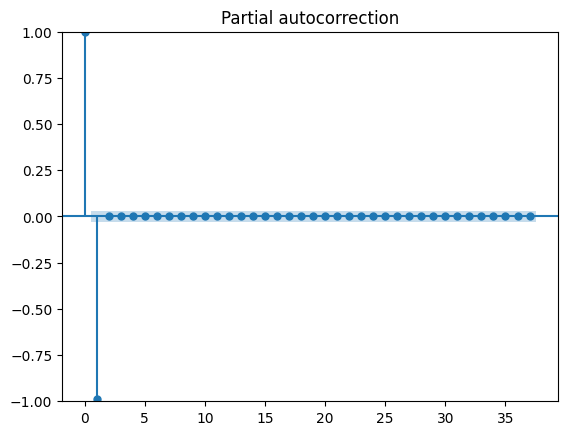

In [30]:
mean = 0
std = 1
num_samples = 5000
samples = np.random.normal(mean, std, size=num_samples)
phis = [-0.7, -0.8, -0.9, -1.01]
for phi in phis:
  ar = myAR(p=1, c=18.0, phi=np.array([phi]))
  print(ar)
  y_t = ar.fit(samples, 1000)
  plt.title("Result from AR for phi: " + str(phi))
  plt.plot(y_t)
  sm.graphics.tsa.plot_acf(y_t,
                             title="Autocorrection")
  plt.show()
  sm.graphics.tsa.plot_pacf(y_t,
                             title="Partial autocorrection")
  plt.show()

For absolute value of phi bigger than 1 the result becomes no n-stationary.

##AR(2)

In [31]:
ar = myAR(p=2, c=8.0, phi=np.array([1.3, -0.7]))
print(ar)
mean = 0
std = 1
num_samples = 5000
samples = np.random.normal(mean, std, size=num_samples)
AR2 = ar.fit(samples, 1000)

AR model: 8.0 + 1.3 * y_t-1 - 0.7 * y_t-2 + et


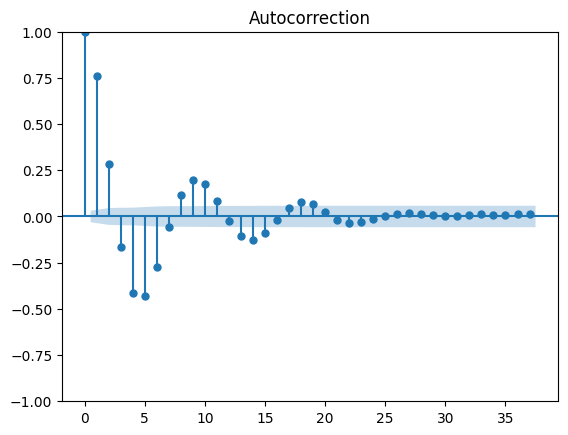

In [32]:
sm.graphics.tsa.plot_acf(AR2,
                             title="Autocorrection")
plt.show()

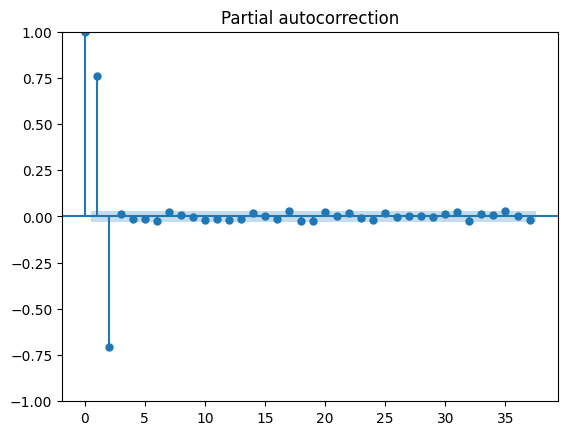

In [33]:
sm.graphics.tsa.plot_pacf(AR2,
                             title="Partial autocorrection")
plt.show()



---

## MA

In [34]:
class myMA():
  def __init__(self, q : int, c : float, thetha: np.array):
    self.q = q
    self.c = c
    self.thetha = thetha
  def fit(self, data_to_fit : np.array):
    size_of_data = len(data_to_fit)
    y = []
    for t in range(self.q, size_of_data):
      y_t = self.c + data_to_fit[t]
      for q_t in range(self.q):
        y_t += self.thetha[q_t] * data_to_fit[t - (q_t+1)]
      y.append(y_t)
    return np.array(y)
  def __repr__(self):
    string = "MA model: "+str(self.c)+" + e_t"
    i = 1
    for thetha_t in self.thetha:
      if thetha_t > 0:
        string += " + " + str(thetha_t) + " * e_t-"+str(i)
      elif thetha_t < 0:
        string += " - " + str(abs(thetha_t)) + " * e_t-"+str(i)
      i += 1
    return string

In [35]:
ma = myMA(q=1, c=20.0, thetha=np.array([0.8]))
print(ma)

MA model: 20.0 + e_t + 0.8 * e_t-1


In [36]:
mean = 0
std = 1
num_samples = 5000
samples = np.random.normal(mean, std, size=num_samples)

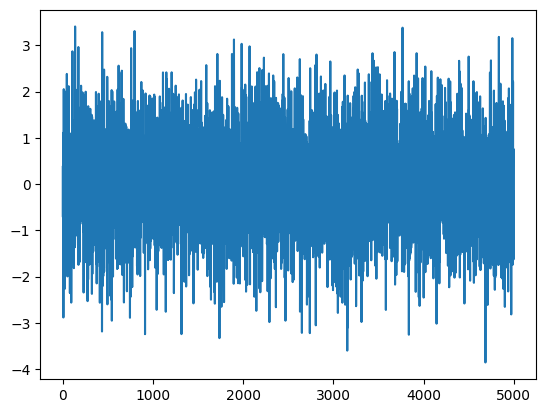

In [37]:
plt.plot(samples)

In [38]:
y_t = ma.fit(samples)

(0.0, 100.0)

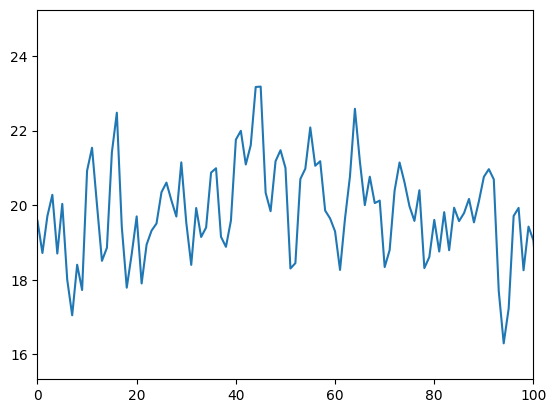

In [39]:
plt.plot(y_t)
plt.xlim([0,100])

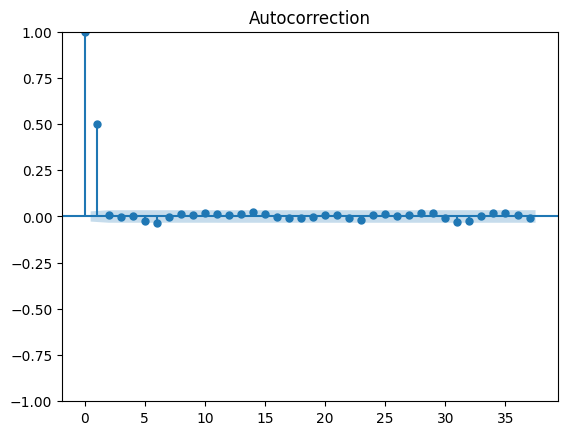

In [40]:
sm.graphics.tsa.plot_acf(y_t,
                             title="Autocorrection")
plt.show()

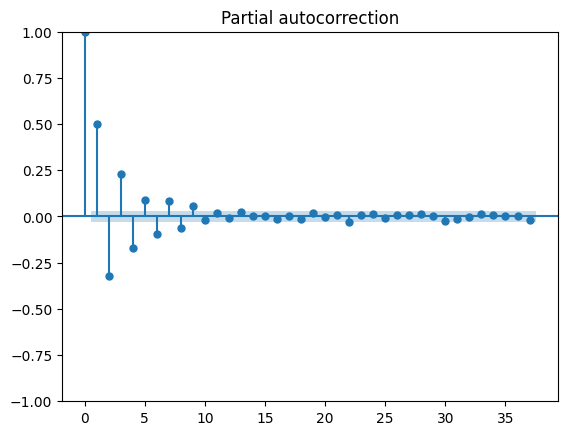

In [41]:
sm.graphics.tsa.plot_pacf(y_t,
                             title="Partial autocorrection")
plt.show()

In [42]:
ma = myMA(q=2, c=0.0, thetha=np.array([-1, 0.8]))
print(ma)

MA model: 0.0 + e_t - 1.0 * e_t-1 + 0.8 * e_t-2


In [43]:
mean = 0
std = 1
num_samples = 5000
samples = np.random.normal(mean, std, size=num_samples)

(0.0, 100.0)

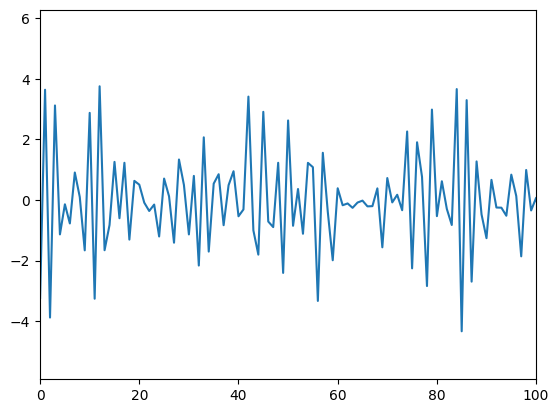

In [44]:
MA2 = ma.fit(samples)
plt.plot(MA2)
plt.xlim([0,100])

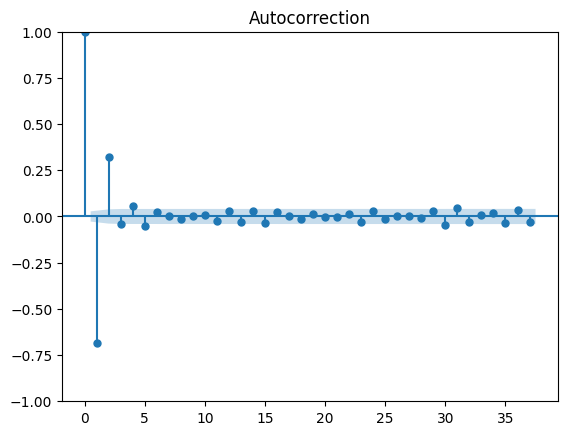

In [45]:
sm.graphics.tsa.plot_acf(MA2,
                             title="Autocorrection")
plt.show()

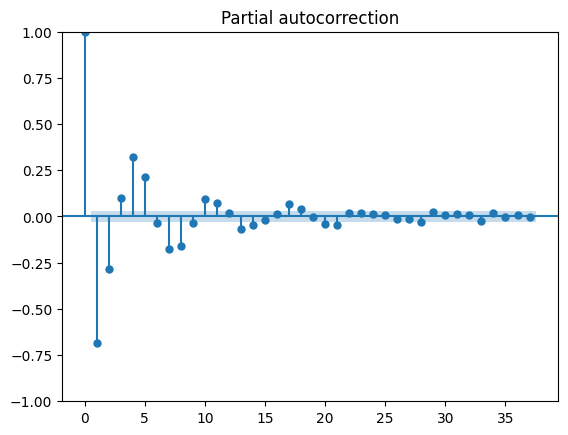

In [46]:
sm.graphics.tsa.plot_pacf(MA2,
                             title="Partial autocorrection")
plt.show()

One can see that autocorreletion and partial autocorrelation of AR model is almost identical to partial autocorelation and autocorellation of MA:

AR autocorrelation <-> MA partial autocorrelation

AR partial autocorreletion <-> MA autocorrelation



---

## TASK 3

Original AR: 8.0 + 1.3 * y_t-1 - 0.7 * y_t-2 + et

In [47]:
print('AIC\tParameters')
for p in range(1, 5):
    model  = ARIMA(AR2, order=(p, 0, 0)).fit()
    score  = model.aic
    params = model.arparams
    print(str(np.round(score, 1)) + " " + str(params))

AIC	Parameters
14233.2 [0.76253076]
11458.1 [ 1.30214333 -0.70736016]
11459.2 [ 1.31260695 -0.72661523  0.01478321]
11460.4 [ 1.31284259 -0.73747603  0.03438238 -0.01491478]


The best model would be the second one:

 AIC: 11453.9

 Parameters: [ 1.3024213  -0.71035401]

In [49]:
print('AIC\tParameters')
for q in range(1, 5):
    model  = ARIMA(MA2, order=(0, 0, q)).fit()
    score  = model.aic
    params = model.maparams
    print(str(np.round(score, 1)) + " " + str(params))

AIC	Parameters
16671.6 [-0.55662315]
14191.2 [-0.99325489  0.79893988]
14192.7 [-1.00107609  0.8085909  -0.00962837]
14194.6 [-1.00110858  0.80593673 -0.00625912 -0.00341704]


Original model:

MA model: 0.0 + e_t - 1.0 * e_t-1 + 0.8 * e_t-2

Best model:

AIC: 14191.2

Parameters: [-0.99325489  0.79893988]